In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
mylist=[]
for data in pd.read_csv('data.csv', delimiter=',' ,chunksize=20000, low_memory=False):
    mylist.append(data)
nyc_df=pd.concat(mylist,axis=0)
del mylist

In [3]:
nyc_df

,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,...,Vehicle Year,Meter Number,Feet From Curb,Violation Post Code,Violation Description,No Standing or Stopping Violation,Hydrant Violation,Double Parking Violation,Unnamed: 43,Unnamed: 44
0,4.714702e+09,KGK6659,NY,PAS,11-12-20,36.0,4DSD,BMW,V,0.0,...,2007.0,NaN,0.0,NaN,PHTO SCHOOL ZN SPEED VIOLATION,NaN,NaN,NaN,NaN,NaN
1,8.793685e+09,L5232HY,TN,PAS,09/14/2020,21.0,TRAC,INTER,T,60790.0,...,0.0,NaN,0.0,W,NaN,NaN,NaN,NaN,NaN,NaN
2,8.864757e+09,BPMN76,FL,PAS,11/25/2020,20.0,SUBN,NISSA,T,36030.0,...,0.0,NaN,0.0,49,20A-No Parking (Non-COM),NaN,NaN,NaN,NaN,NaN
3,8.778326e+09,57387MJ,NY,COM,08/20/2020,38.0,VAN,NaN,T,34430.0,...,2016.0,NaN,0.0,1,NaN,NaN,NaN,NaN,NaN,NaN
4,4.706641e+09,M81KFJ,NJ,PAS,09-09-20,36.0,UT,TOYOT,V,0.0,...,2002.0,NaN,0.0,NaN,PHTO SCHOOL ZN SPEED VIOLATION,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
nyc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50113 entries, 0 to 50112
Data columns (total 45 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Summons Number                     50000 non-null  float64
 1   Plate ID                           50000 non-null  object 
 2   Registration State                 50000 non-null  object 
 3   Plate Type                         50000 non-null  object 
 4   Issue Date                         50000 non-null  object 
 5   Violation Code                     50000 non-null  float64
 6   Vehicle Body Type                  49855 non-null  object 
 7   Vehicle Make                       49864 non-null  object 
 8   Issuing Agency                     50000 non-null  object 
 9   Street Code1                       50000 non-null  float64
 10  Street Code2                       50000 non-null  float64
 11  Street Code3                       50000 non-null  flo

In [5]:
cols_without_total_null = nyc_df.drop(['Hydrant Violation','Double Parking Violation','Unnamed: 43','Unnamed: 44','No Standing or Stopping Violation'],axis = 1)
cols_without_total_null

,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,...,Days Parking In Effect,From Hours In Effect,To Hours In Effect,Vehicle Color,Unregistered Vehicle?,Vehicle Year,Meter Number,Feet From Curb,Violation Post Code,Violation Description
0,4.714702e+09,KGK6659,NY,PAS,11-12-20,36.0,4DSD,BMW,V,0.0,...,NaN,NaN,NaN,GY,NaN,2007.0,NaN,0.0,NaN,PHTO SCHOOL ZN SPEED VIOLATION
1,8.793685e+09,L5232HY,TN,PAS,09/14/2020,21.0,TRAC,INTER,T,60790.0,...,Y,0830A,1000A,WHITE,NaN,0.0,NaN,0.0,W,NaN
2,8.864757e+09,BPMN76,FL,PAS,11/25/2020,20.0,SUBN,NISSA,T,36030.0,...,YYYYYYY,NaN,NaN,BLACK,NaN,0.0,NaN,0.0,49,20A-No Parking (Non-COM)
3,8.778326e+09,57387MJ,NY,COM,08/20/2020,38.0,VAN,NaN,T,34430.0,...,YYYYY,0700A,0700P,WH,NaN,2016.0,NaN,0.0,1,NaN
4,4.706641e+09,M81KFJ,NJ,PAS,09-09-20,36.0,UT,TOYOT,V,0.0,...,NaN,NaN,NaN,NaN,NaN,2002.0,NaN,0.0,NaN,PHTO SCHOOL ZN SPEED VIOLATION
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
cols_without_total_null.shape[0]

50113

In [7]:
cols_without_total_null.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50113 entries, 0 to 50112
Data columns (total 40 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Summons Number                     50000 non-null  float64
 1   Plate ID                           50000 non-null  object 
 2   Registration State                 50000 non-null  object 
 3   Plate Type                         50000 non-null  object 
 4   Issue Date                         50000 non-null  object 
 5   Violation Code                     50000 non-null  float64
 6   Vehicle Body Type                  49855 non-null  object 
 7   Vehicle Make                       49864 non-null  object 
 8   Issuing Agency                     50000 non-null  object 
 9   Street Code1                       50000 non-null  float64
 10  Street Code2                       50000 non-null  float64
 11  Street Code3                       50000 non-null  flo

In [19]:
cols_without_total_null.corr()["Violation Code"].sort_values()

Law Section               -0.054712
Vehicle Year              -0.004706
Street Code1               0.005292
Violation Location         0.005475
Date First Observed        0.019092
Street Code2               0.019760
Street Code3               0.028754
Issuer Precinct            0.049349
Vehicle Expiration Date    0.050610
Violation Precinct         0.052380
Summons Number             0.059504
Feet From Curb             0.069470
Issuer Code                0.090940
Violation Code             1.000000
Name: Violation Code, dtype: float64

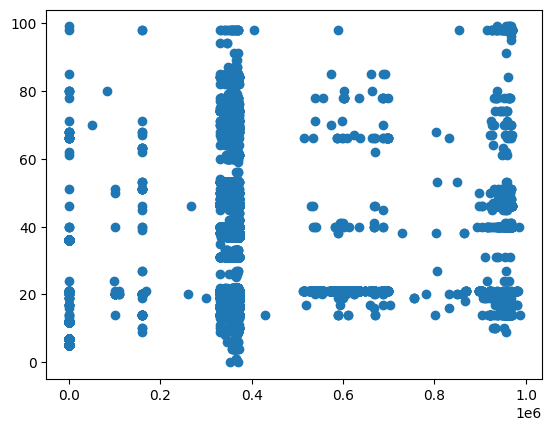

In [20]:
plt.scatter(cols_without_total_null["Issuer Code"],cols_without_total_null["Violation Code"]);
#plt.show()

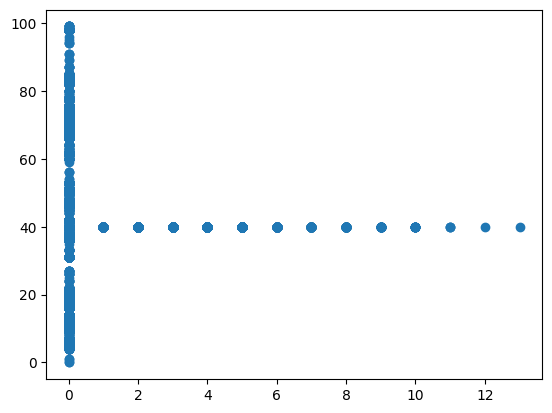

In [21]:
plt.scatter(cols_without_total_null["Feet From Curb"],cols_without_total_null["Violation Code"]);

In [56]:
a=cols_without_total_null[(cols_without_total_null["Issuer Code"])>0.4]
a

,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,...,Days Parking In Effect,From Hours In Effect,To Hours In Effect,Vehicle Color,Unregistered Vehicle?,Vehicle Year,Meter Number,Feet From Curb,Violation Post Code,Violation Description
1,8.793685e+09,L5232HY,TN,PAS,09/14/2020,21.0,TRAC,INTER,T,60790.0,...,Y,0830A,1000A,WHITE,NaN,0.0,NaN,0.0,W,NaN
2,8.864757e+09,BPMN76,FL,PAS,11/25/2020,20.0,SUBN,NISSA,T,36030.0,...,YYYYYYY,NaN,NaN,BLACK,NaN,0.0,NaN,0.0,49,20A-No Parking (Non-COM)
3,8.778326e+09,57387MJ,NY,COM,08/20/2020,38.0,VAN,NaN,T,34430.0,...,YYYYY,0700A,0700P,WH,NaN,2016.0,NaN,0.0,1,NaN
6,8.818510e+09,HLB4150,NY,PAS,07/14/2020,20.0,SUBN,HONDA,T,83630.0,...,YYYYY,0800A,0600P,GY,NaN,2008.0,NaN,0.0,W,NaN
8,8.835407e+09,KDK9499,NY,PAS,11-12-20,74.0,SEDN,HONDA,T,54650.0,...,YYYYYYY,NaN,NaN,GREY,NaN,2008.0,NaN,0.0,3,74-Missing Display Plate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,8.875952e+09,JLJ4585,NY,PAS,11/17/2020,21.0,4DSD,MITSU,T,57090.0,...,Y,0830A,1000A,BLACK,NaN,2017.0,NaN,0.0,W,21-No Parking (street clean)
49996,8.794438e+09,174ZYG,CT,PAS,08/25/2020,31.0,4DSD,TOYOT,T,34030.0,...,YYYYY,0800A,0700P,BLACK,NaN,0.0,NaN,0.0,16,NaN
49997,8.849770e+09,HES6895,NY,PAS,11-03-20,46.0,SUBN,CADIL,T,27120.0,...,YYYYYYY,NaN,NaN,RD,NaN,2005.0,NaN,0.0,K,NaN
49998,8.755448e+09,63035MN,NY,COM,08/19/2020,40.0,DELV,ISUZU,T,0.0,...,YYYYYYY,NaN,NaN,WH,NaN,2020.0,NaN,5.0,67,NaN


In [57]:
b = cols_without_total_null[(cols_without_total_null["Violation Code"])< 60]
b

,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,...,Days Parking In Effect,From Hours In Effect,To Hours In Effect,Vehicle Color,Unregistered Vehicle?,Vehicle Year,Meter Number,Feet From Curb,Violation Post Code,Violation Description
0,4.714702e+09,KGK6659,NY,PAS,11-12-20,36.0,4DSD,BMW,V,0.0,...,NaN,NaN,NaN,GY,NaN,2007.0,NaN,0.0,NaN,PHTO SCHOOL ZN SPEED VIOLATION
1,8.793685e+09,L5232HY,TN,PAS,09/14/2020,21.0,TRAC,INTER,T,60790.0,...,Y,0830A,1000A,WHITE,NaN,0.0,NaN,0.0,W,NaN
2,8.864757e+09,BPMN76,FL,PAS,11/25/2020,20.0,SUBN,NISSA,T,36030.0,...,YYYYYYY,NaN,NaN,BLACK,NaN,0.0,NaN,0.0,49,20A-No Parking (Non-COM)
3,8.778326e+09,57387MJ,NY,COM,08/20/2020,38.0,VAN,NaN,T,34430.0,...,YYYYY,0700A,0700P,WH,NaN,2016.0,NaN,0.0,1,NaN
4,4.706641e+09,M81KFJ,NJ,PAS,09-09-20,36.0,UT,TOYOT,V,0.0,...,NaN,NaN,NaN,NaN,NaN,2002.0,NaN,0.0,NaN,PHTO SCHOOL ZN SPEED VIOLATION
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,4.014246e+09,JPN4910,NY,PAS,06/25/2020,5.0,PICK,FORD,V,0.0,...,NaN,NaN,NaN,RD,NaN,2019.0,NaN,0.0,NaN,BUS LANE VIOLATION
49996,8.794438e+09,174ZYG,CT,PAS,08/25/2020,31.0,4DSD,TOYOT,T,34030.0,...,YYYYY,0800A,0700P,BLACK,NaN,0.0,NaN,0.0,16,NaN
49997,8.849770e+09,HES6895,NY,PAS,11-03-20,46.0,SUBN,CADIL,T,27120.0,...,YYYYYYY,NaN,NaN,RD,NaN,2005.0,NaN,0.0,K,NaN
49998,8.755448e+09,63035MN,NY,COM,08/19/2020,40.0,DELV,ISUZU,T,0.0,...,YYYYYYY,NaN,NaN,WH,NaN,2020.0,NaN,5.0,67,NaN
